In [2]:
using PyCall
using PyPlot
using LaTeXStrings
using LinearAlgebra

In [3]:
mp = pyimport("mpmath");

In [4]:
rc("text", usetex=true)

In [5]:
t_list = range(0.01,stop=20,length=200)

κ1 = 0.3
κ2 = 0.4
κ3 = 0.5

;

In [6]:
function rho(t,κ)
    return convert(Float64,mp.tanh(κ*t)*mp.sqrt(1+((κ*t-mp.coth(κ*t))/(κ))^2))
end

function drho(t,κ)
    return convert(Float64,(-1-κ*t*mp.coth(κ*t)+(κ*mp.sech(κ*t)^2)*(κ+κ*t^2+t*mp.sinh(2*κ*t)))/(κ*mp.sqrt(1+((κ*t-mp.coth(κ*t))/(κ))^2)))
end

function omegar(t,κ)
    return mp.atan((κ*t-mp.coth(κ*t))/(κ))
end
;

In [7]:
vrho_1 = zeros(Float64,length(t_list))
for i in 2:length(t_list)
   vrho_1[1] = 3.3333333333333335
   vrho_1[i] = rho(t_list[i],κ1)
end

vrho_2 = zeros(Float64,length(t_list))
for i in 2:length(t_list)
   vrho_2[1] = 2.5
   vrho_2[i] = rho(t_list[i],κ2)
end

vrho_3 = zeros(Float64,length(t_list))
for i in 2:length(t_list)
   vrho_3[1] = 2.0
   vrho_3[i] = rho(t_list[i],κ3)
end

In [8]:
vdrho_1 = zeros(Float64,length(t_list))
for i in 2:length(t_list)
   vdrho_1[1] = 0
   vdrho_1[i] = drho(t_list[i],κ1)
end

vdrho_2 = zeros(Float64,length(t_list))
for i in 2:length(t_list)
   vdrho_2[1] = 0
   vdrho_2[i] = drho(t_list[i],κ2)
end

vdrho_3 = zeros(Float64,length(t_list))
for i in 2:length(t_list)
   vdrho_3[1] = 0
   vdrho_3[i] = drho(t_list[i],κ3)
end

In [9]:
vom_1 = zeros(Float64,length(t_list))
for i in 2:length(t_list)
   vom_1[1] = -1.57
   vom_1[i] = omegar(t_list[i],κ1)
end

vom_2 = zeros(Float64,length(t_list))
for i in 2:length(t_list)
   vom_2[1] = -1.57
   vom_2[i] = omegar(t_list[i],κ2)
end

vom_3 = zeros(Float64,length(t_list))
for i in 2:length(t_list)
   vom_3[1] = -1.57
   vom_3[i] = omegar(t_list[i],κ3)
end

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(15,15),sharex=true)
plt.subplots_adjust(hspace = 0.1)

ax1.plot(vrho_1,"b--", linewidth=5,label=L"\kappa=0.3")
ax2.plot(vdrho_1,"b--", linewidth=5)
ax3.plot(vom_1,"b--", linewidth=5)

ax1.plot(vrho_2,"r:", linewidth=5,label=L"\kappa=0.4")
ax2.plot(vdrho_2,"r:", linewidth=5)
ax3.plot(vom_2,"r:", linewidth=5)

ax1.plot(vrho_3,"y-.", linewidth=5,label=L"\kappa=0.5")
ax2.plot(vdrho_3,"y-.", linewidth=5)
ax3.plot(vom_3,"y-.", linewidth=5)

ax1.set_aspect("auto")
ax2.set_aspect("auto")
ax3.set_aspect("auto")

ax1.tick_params(direction="out",length=10,width=3,labelsize=48)
ax2.tick_params(direction="out",length=10,width=3,labelsize=48)
ax3.tick_params(direction="out",length=10,width=3,labelsize=48)

ax3.set_xticks(range(0,stop=length(t_list),step=50))
ax3.set_xticklabels([L"0",L"5",L"10",L"15",L"20"])

ax1.set_ylim(0,18)
ax2.set_ylim(-1.5,1.5)

ax3.set_xlim(0,200)
ax3.set_ylim(-2,2)

ax1.grid(linewidth=3)
ax2.grid(linewidth=3)
ax3.grid(linewidth=3)

ax1.set_ylabel(L"\rho(t)",fontsize=50)
ax2.set_ylabel(L"\dot{\rho}(t)",fontsize=50)
ax3.set_ylabel(L"\omega_{\rho}(t)",fontsize=50)

ax3.set_xlabel(L"t\ [s]",fontsize = 50)

ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=3, mode="expand", borderaxespad=1.0,fontsize=32)

show()

#savefig("parakvn.png", transparent = "true", dpi=300)

In [10]:
rho01 = 3.3333333333333
rho02 = 2.5
rho03 = 2.0

drho01 = 0
drho02 = 0
drho03 = 0

;

In [11]:
function β1(t,κ,ρ0)
    return convert(Float64,(ρ0/rho(t,κ))*mp.cos(omegar(t,κ))-ρ0*drho(t,κ)*mp.sin(omegar(t,κ)))
end

function β2(t,κ,ρ0)
    return convert(Float64,ρ0*rho(t,κ)*mp.sin(omegar(t,κ)))
end

function β3(t,κ,ρ0)
    return convert(Float64,ρ0*rho(t,κ)*mp.cos(omegar(t,κ)))
end

function β4(t,κ,ρ0,dρ0)
    return convert(Float64,(ρ0*drho(t,κ)+dρ0/rho(t,κ))*mp.cos(omegar(t,κ))+(ρ0/rho(t,κ))*mp.sin(omegar(t,κ)))
end

;

In [12]:
B1 = (-11.111111111111001,-6.25,-4.0)
B2 = (-11.111111111111001,-6.25,-4.0)
B3 = (0,0,0)
B4 = (-1.0,-1.0,-1.0)
;

In [13]:
function qc1(q,p,t)
    if t == 0
        return q*B1[1]-p*B2[1]
    else
        return q*β1(t,κ1,rho01)-p*β2(t,κ1,rho01)
    end
end
    
function pc1(q,p,t)
    if t == 0
        return p*B3[1]+q*B4[1]
    else
        return p*β3(t,κ1,rho01)+q*β4(t,κ1,rho01,drho01)
    end
end
        
function qc2(q,p,t)
    if t == 0
        return q*B1[2]-p*B2[2]
    else
        return q*β1(t,κ2,rho02)-p*β2(t,κ2,rho02)
    end
end
    
function pc2(q,p,t)
    if t == 0
        return p*B3[2]+q*B4[2]
    else
        return p*β3(t,κ2,rho02)+q*β4(t,κ2,rho02,drho02)
    end
end
                
function qc3(q,p,t)
    if t == 0
        return q*B1[3]-p*B2[3]
    else
        return q*β1(t,κ3,rho03)-p*β2(t,κ3,rho03)
    end
end
    
function pc3(q,p,t)
    if t == 0
        return p*B3[3]+q*B4[3]
    else
        return p*β3(t,κ3,rho03)+q*β4(t,κ2,rho03,drho03)
    end
end
        
;

In [14]:
qv1 = zeros(Float64,length(t_list))
for i in 1:length(t_list)
    qv1[i] = qc1(-1,1,t_list[i])
end
pv1 = zeros(Float64,length(t_list))
for i in 1:length(t_list)
    pv1[i] = pc1(-1,1,t_list[i])
end

qv2 = zeros(Float64,length(t_list))
for i in 1:length(t_list)
    qv2[i] = qc2(-1,1,t_list[i])
end
pv2 = zeros(Float64,length(t_list))
for i in 1:length(t_list)
    pv2[i] = pc2(-1,1,t_list[i])
end

qv3 = zeros(Float64,length(t_list))
for i in 1:length(t_list)
    qv3[i] = qc3(-1,1,t_list[i])
end
pv3 = zeros(Float64,length(t_list))
for i in 1:length(t_list)
    pv3[i] = pc3(-1,1,t_list[i])
end

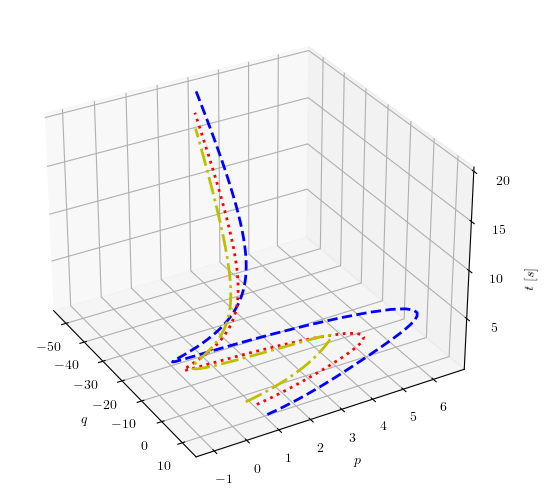

In [16]:
ww = 6.20
hh = ww

figps = figure(figsize=(ww,hh))
axps = gca(projection="3d")
plot3D(qv1,pv1,collect(t_list),"b--", linewidth=2)
plot3D(qv2,pv2,collect(t_list),"r:", linewidth=2)
plot3D(qv3,pv3,collect(t_list),"y-.", linewidth=2)
axps.view_init(30,-30)
xlabel(L"q",fontsize=10)
ylabel(L"p",fontsize=10)
zlabel(L"t\ [s]",fontsize=10)
axps.tick_params(axis="both",direction="out",length=10,width=3,labelsize=10,grid_linewidth=3)
axps.set_zticks(range(0,stop=20,step=5))
axps.set_zticklabels([L"0",L"5",L"10",L"15",L"20"])
show()
tight_layout()

savefig("hypckvn_d.pdf", transparent = "true", dpi=300, bbox_inches="tight", pad_inches=0)